**<center> Joaquin Peñuela Parra, Cristian Fernando Rodriguez Cruz <center>**
**<center> University of Los Andes <center>**
**<center> High Energy Physics Group: Phenomenology of Particles <center>**

In [1]:
import os
import sys
import numpy as np
import pandas as pd

!git clone https://github.com/Phenomenology-group-uniandes/Heatmap_Utilities.git
import nbimporter
sys.path.append(f'{os.getcwd()}/Heatmap_Utilities')
from Heatmap_Utilities.Main_Functions import smooth, plot_heatmap

Cloning into 'Heatmap_Utilities'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 62 (delta 28), reused 36 (delta 13), pack-reused 0
Receiving objects: 100% (62/62), 2.70 MiB | 4.21 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [2]:
path_signal_production = os.path.join(os.path.dirname(os.getcwd()), '01_signal_production')
path_statistical_preparation = os.path.join(os.path.dirname(os.getcwd()), '06_Statistical_Preparation')

In [20]:
folders = {'wRHC': 'Data_Generation_wRHC', 'woRHC': 'Data_Generation_woRHC'}
signals = ['lq_lq', 'lq_ta', 'ta_ta']

g_U = [float(g) for g in ["0.25", "0.5", "1.0", "1.5", "1.8", "2.0", "2.5", "3.0", "3.5"]]

In [21]:
for betard in folders.keys():
    for signal in signals:
        data = pd.read_csv(f'{path_signal_production}/{folders[betard]}/Data_5K_13_TeV/{signal}/Cross_Sections/XS_Matriz.csv', index_col= 0)
        data.index = [float(fila) for fila in data.index]
        data.columns = [float(col) for col in data.columns]
                
        KFactor = {}
        for col in data.columns:
            KFactor[col] = {}
            for fila in g_U:
                KFactor[col][fila] = data[col][fila]/data[col][1.8]
        
        KFactor = pd.DataFrame.from_dict(KFactor)
        KFactor = KFactor.sort_index(ascending = True)
        
        path_file = f'{path_statistical_preparation}/KFactors_by_coupling/{betard}/{signal}'.replace('lq_lq', 'Lq_Lq').replace('lq_ta', 'tau_Lq').replace('ta_ta', 'tau_tau')
        KFactor.to_csv(f'{path_file}.csv')
        KFactor.to_excel(f'{path_file}.xlsx')

**Problema:**

In [23]:
g_U = np.arange(0.5, 3.5 + 1/16, 1/16)

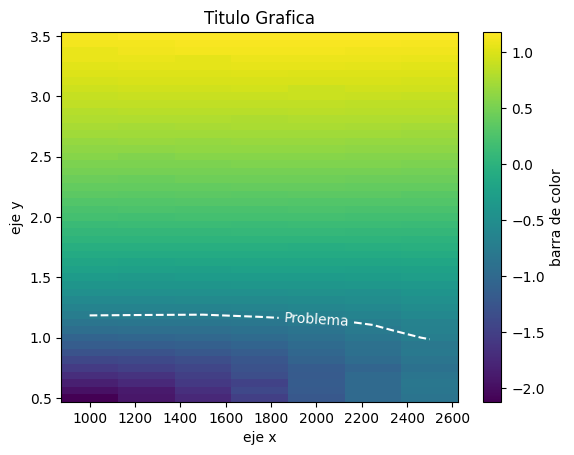

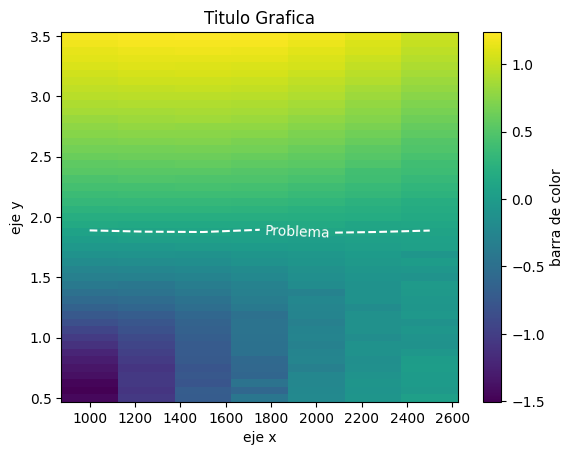

In [24]:
for betard in folders.keys():
    for signal in signals:
        data = pd.read_csv(f'{path_signal_production}/{folders[betard]}/Data_5K_13_TeV/{signal}/Cross_Sections/XS_Matriz.csv', index_col= 0)
        data.index = [float(fila) for fila in data.index]
        data.columns = [float(col) for col in data.columns]
        
        # if signal == 'ta_ta': plot_heatmap(np.log10(data), curvas_de_nivel= {np.log10(0.0025): 'log10(0.0025)'})
        
        KFactor = {}
        for col in data.columns:
            KFactor[col] = {}
            for fila in g_U:
                KFactor[col][fila] = data[col][fila]/data[col][1.8]
        
        KFactor = pd.DataFrame.from_dict(KFactor)
        KFactor = KFactor.sort_index(ascending = True)
        
        path_file = f'{path_statistical_preparation}/KFactors_by_coupling/{betard}/{signal}'.replace('lq_lq', 'Lq_Lq').replace('lq_ta', 'tau_Lq').replace('ta_ta', 'tau_tau')
        # KFactor.to_csv(f'{path_file}.csv')
        # KFactor.to_excel(f'{path_file}.xlsx')
        
        if signal == 'ta_ta': plot_heatmap(np.log10(KFactor), curvas_de_nivel= {np.log10(0.002/data[col][1.8]): 'Problema'})